In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport

In [69]:
dataset  = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
dataset

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
241  6.5       fire     
242    0   not fire     
243  0.2   not fire     
244  0.7   not fire     
245  0.5  not fire      

[246 rows x 14 columns]

In [70]:
#pf = ProfileReport(dataset)
#pf

In [71]:
dataset[dataset.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [72]:
dataset.loc[:122, "Region"] = 0
dataset.loc[122:, "Region"] = 1

df = dataset

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [74]:
df[['Region']] = df[['Region']].astype(int)

In [75]:
df = df.dropna().reset_index(drop=True)

In [76]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire          0  
1  not fire          0  
2  not fire          0  
3  not fire          0  
4  not fire          0

In [83]:
df.iloc[[122]]

index  day  month  year  Temperature   RH   Ws   Rain  FFMC  DMC  DC  \
122    122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC   

     ISI  BUI  FWI    Classes  Region  
122  ISI  BUI  FWI  Classes         1

In [84]:
df = df.drop(122).reset_index()

In [85]:
df.columns

Index(['level_0', 'index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws',
       'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [86]:
df.columns = df.columns.str.strip()
df.columns

Index(['level_0', 'index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws',
       'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   level_0      243 non-null    int64 
 1   index        243 non-null    int64 
 2   day          243 non-null    object
 3   month        243 non-null    object
 4   year         243 non-null    object
 5   Temperature  243 non-null    object
 6   RH           243 non-null    object
 7   Ws           243 non-null    object
 8   Rain         243 non-null    object
 9   FFMC         243 non-null    object
 10  DMC          243 non-null    object
 11  DC           243 non-null    object
 12  ISI          243 non-null    object
 13  BUI          243 non-null    object
 14  FWI          243 non-null    object
 15  Classes      243 non-null    object
 16  Region       243 non-null    int32 
dtypes: int32(1), int64(2), object(14)
memory usage: 31.4+ KB


In [88]:
df[['day', 'month', 'year', 'RH', 'Ws']] = df[['day', 'month', 'year', 'RH', 'Ws']].astype(int)

In [89]:
objects = [features for features in df.columns if df[features].dtypes=='O']

for i in objects:
    if(i!='Classes'):
        df[i] = df[i].astype(float)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      243 non-null    int64  
 1   index        243 non-null    int64  
 2   day          243 non-null    int32  
 3   month        243 non-null    int32  
 4   year         243 non-null    int32  
 5   Temperature  243 non-null    float64
 6   RH           243 non-null    int32  
 7   Ws           243 non-null    int32  
 8   Rain         243 non-null    float64
 9   FFMC         243 non-null    float64
 10  DMC          243 non-null    float64
 11  DC           243 non-null    float64
 12  ISI          243 non-null    float64
 13  BUI          243 non-null    float64
 14  FWI          243 non-null    float64
 15  Classes      243 non-null    object 
 16  Region       243 non-null    int32  
dtypes: float64(8), int32(6), int64(2), object(1)
memory usage: 26.7+ KB


In [91]:
#pf = ProfileReport(dataset)
#pf.to_widgets()

In [92]:
df.describe()

level_0       index         day       month    year  Temperature  \
count  243.000000  243.000000  243.000000  243.000000   243.0   243.000000   
mean   121.497942  121.497942   15.761317    7.502058  2012.0    32.152263   
std     70.726594   70.726594    8.842552    1.114793     0.0     3.628039   
min      0.000000    0.000000    1.000000    6.000000  2012.0    22.000000   
25%     60.500000   60.500000    8.000000    7.000000  2012.0    30.000000   
50%    121.000000  121.000000   16.000000    8.000000  2012.0    32.000000   
75%    182.500000  182.500000   23.000000    8.000000  2012.0    35.000000   
max    243.000000  243.000000   31.000000    9.000000  2012.0    42.000000   

               RH          Ws        Rain        FFMC         DMC          DC  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean    62.041152   15.493827    0.762963   77.842387   14.680658   49.430864   
std     14.828160    2.811385    2.003207   14.349641   12.393040   47.665606   
min     21.000000    6.000000    0.000000   28.600000    0.700000    6.900000   
25%     52.500000   14.000000    0.000000   71.850000    5.800000   12.350000   
50%     63.000000   15.000000    0.000000   83.300000   11.300000   33.100000   
75%     73.500000   17.000000    0.500000   88.300000   20.800000   69.100000   
max     90.000000   29.000000   16.800000   96.000000   65.900000  220.400000   

              ISI         BUI         FWI      Region  
count  243.000000  243.000000  243.000000  243.000000  
mean     4.742387   16.690535    7.035391    0.497942  
std      4.154234   14.228421    7.440568    0.501028  
min      0.000000    1.100000    0.000000    0.000000  
25%      1.400000    6.000000    0.700000    0.000000  
50%      3.500000   12.400000    4.200000    0.000000  
75%      7.250000   22.650000   11.450000    1.000000  
max     19.000000   68.000000   31.100000    1.000000

In [34]:
df.to_csv('Algerian_forest_fires_Cleaned.csv', index=False)

## EDA

In [39]:
df_copy = df.drop(['day','month','year'], axis=1)

In [40]:
df_copy

index  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0        0         29.0  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1        1         29.0  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2        2         26.0  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3        3         25.0  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4        4         27.0  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..     ...          ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
238    239         30.0  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
239    240         28.0  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
240    241         27.0  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
241    242         24.0  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
242    243         24.0  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

          Classes  Region  
0     not fire          0  
1     not fire          0  
2     not fire          0  
3     not fire          0  
4     not fire          0  
..            ...     ...  
238       fire          1  
239   not fire          1  
240   not fire          1  
241   not fire          1  
242  not fire           1  

[243 rows x 13 columns]

In [41]:
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [43]:
df_copy['Classes']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object

In [46]:
df_copy.Classes = df_copy.Classes.str.strip()

In [47]:
df_copy['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [48]:
df_copy['Classes'] = np.where(df_copy['Classes']=='not fire',0,1)


In [57]:
df_copy.drop(['df_index'], axis=1, inplace=True)
df_copy

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
0           29.0  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5        0   
1           29.0  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4        0   
2           26.0  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1        0   
3           25.0  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0        0   
4           27.0  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5        0   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...      ...   
238         30.0  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
239         28.0  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        0   
240         27.0  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        0   
241         24.0  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        0   
242         24.0  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        0   

     Region  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
238       1  
239       1  
240       1  
241       1  
242       1  

[243 rows x 12 columns]

In [50]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [59]:
pf = ProfileReport(df_copy)
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Monthly Fire Analysis

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

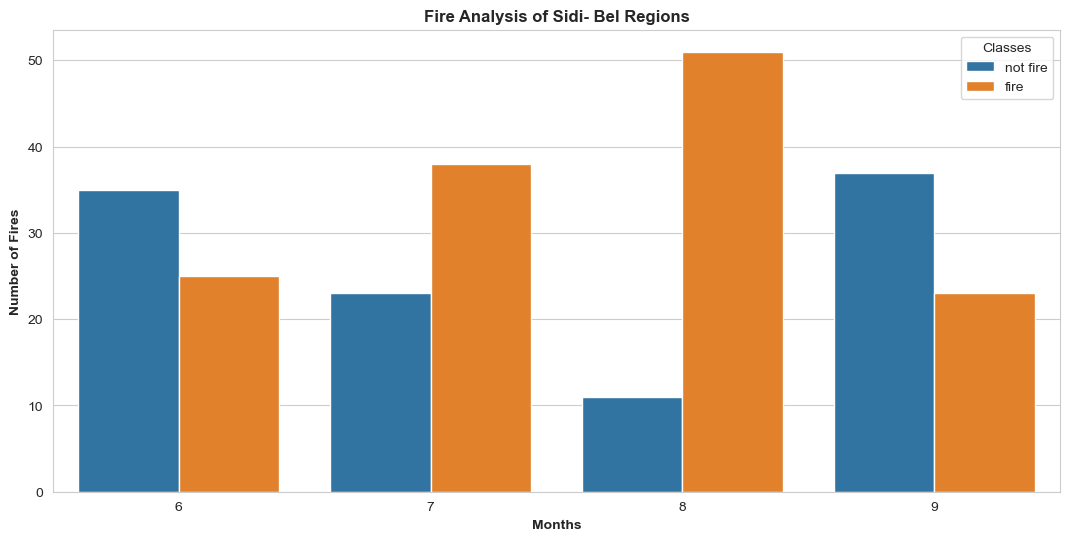

In [66]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')


dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions", weight='bold')


Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

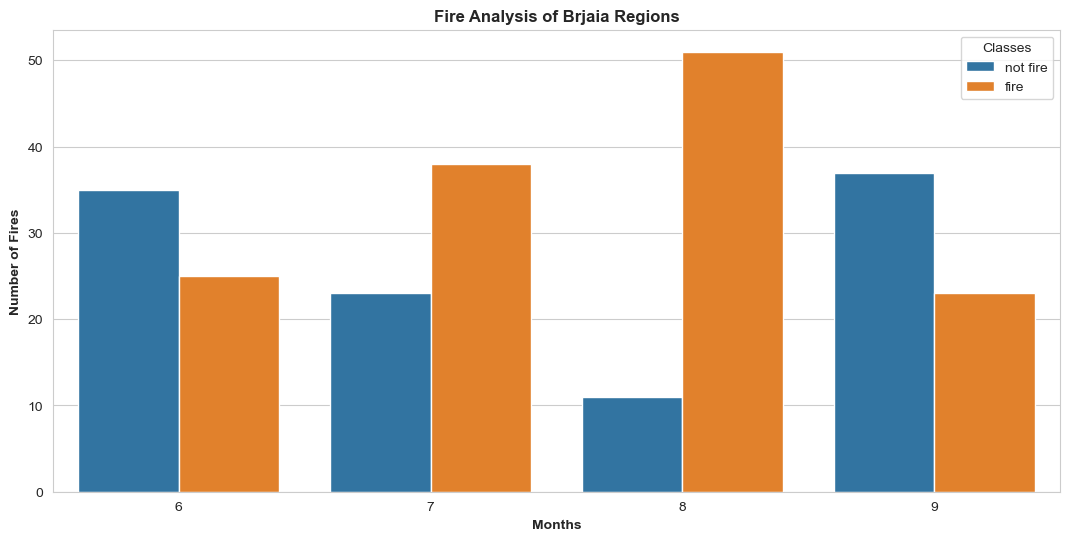

In [67]:
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire Analysis of Brjaia Regions", weight='bold')


August had most number of fires for both regions

August ->most fire followed by July and June

september-> least number of fires